## HW. Fruits
- 비지도학습

### 모듈 로딩

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.utils import plot_model # 모델 플롯 그리기
from keras.utils import set_random_seed # 랜덤 시드 설정
from keras.models import save_model, load_model # 모델 저장 및 로드
from sklearn.metrics import silhouette_samples
from PIL import Image  # 이미지 처리
dic = {0: 'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown', 6:'tab:pink', 7:'tab:gray', 8:'tab:olive', 9:'tab:cyan'}

### 데이터 로딩

In [2]:
fruits = np.load("fruits_300.npy")
fruits.shape

(300, 100, 100)

### 이미지 그려보기

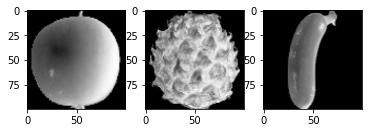

In [3]:
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.imshow(fruits[65], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(fruits[100], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(fruits[240], cmap='gray')
plt.show()

### 데이터 전처리

In [4]:
# 표준화
fruits = fruits / 255.0
# 차원을 2로 만들기
fruits_re = fruits.reshape(-1, 100*100)

- Davies Bouldin Index: Group 내에서의 Distribution과 비교하여 다른 Group간의 분리 정도의 비율로 계산되는 값으로 모든 두 개의 Group 쌍에 대해 각 Group의 크기의 합을 각 Group의 중심 간 거리로 나눈 값으로서 표현되는 함수이다. 즉, 값이 작을수록 최적화된 군집이라고 할 수 있다.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
ine = []; sil = [] ; dav = []
for i in range(1, 11):
    km = KMeans()
    km.fit(fruits_re)
    fruit_pred = km.fit_predict(fruits_re)
    ine.append(km.inertia_)
    sil.append(silhouette_score(fruits_re, fruit_pred))
    dav.append(davies_bouldin_score(fruits_re, fruit_pred))

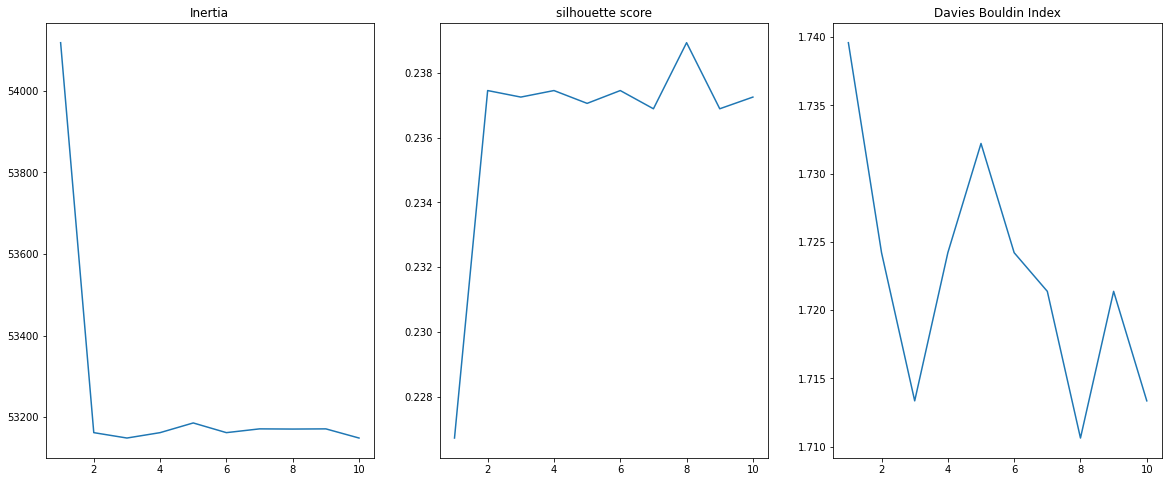

In [6]:
plt.rcParams['figure.figsize'] = (20,8)
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.plot(range(1,11), ine)
plt.title("Inertia")
plt.subplot(1,3,2)
plt.plot(range(1,11), sil)
plt.title("silhouette score" )
plt.subplot(1,3,3)
plt.plot(range(1,11), dav)
plt.title("Davies Bouldin Index")
plt.show()

In [7]:
fruits

array([[[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.0

In [8]:
km = KMeans(n_clusters=3)
km.fit(fruits_re)
fruit_pred = km.fit_predict(fruits_re)

In [9]:
fruit_name = {0: 'apple', 2: 'pineapple', 1:'banana'}
fruit_pred

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
from random import shuffle
ind = np.arange(0,300)
shuffle(ind)
ind[0:10]

array([ 37,  65, 258, 205, 149, 151, 110, 252, 175, 120])

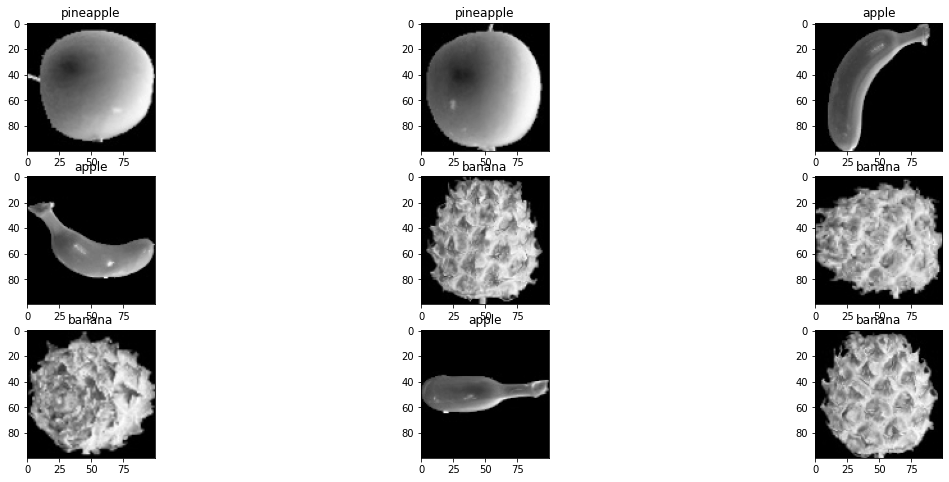

In [11]:
id = ind[0:10]
plt.subplots(3,3)
for i in range(0,3):
    plt.subplot(3,3,3*i+1)
    plt.imshow(fruits[id[3*i]], cmap='gray')
    plt.title(f"{fruit_name[fruit_pred[id[3*i]]]}")
    plt.subplot(3,3,3*i+2)
    plt.imshow(fruits[id[3*i+1]], cmap='gray')
    plt.title(f"{fruit_name[fruit_pred[id[3*i+1]]]}")
    plt.subplot(3,3,3*i+3)
    plt.imshow(fruits[id[3*i+2]], cmap='gray')
    plt.title(f"{fruit_name[fruit_pred[id[3*i+2]]]}")
plt.show()

In [17]:
silhouette_samples(fruits_re, ['a','b','c'])

ValueError: Found input variables with inconsistent numbers of samples: [300, 3]